# <strong>Data Scince Capstone</strong>

## <strong>Introduction</strong>

<p>In this project we are working on 'The Bread Basket' data set,<br/>
The dataset belongs to "The Bread Basket" a bakery located in Edinburgh,<br/>
<a href="https://www.kaggle.com/mittalvasu95/the-bread-basket">Data Set Link</a>,<br/>
We applied CRISP-DM process to answer on the questions.
</p>

## <strong>A. Business Understanding</strong>

The data set contains transactions of the store, so the main goal is to answer on sales related quetion:<br/>
<Strong>Q1- How many items are there?<br/>
Q2- Top 10 most ordered products?<br/>
Q3- Which time period has more transactions?<br/>
Q4- Which day type has more transaction?<br/>
Q5- What customers preffer to buy on weekends morning?<br/>
Q6- Which month has more sales?<br/>    
</Strong>
<br/><br/>
and the final and most important question:<br/>
<strong>MQ- Recommend bundles to increase sales?</strong>

## <strong>B. Data Understanding</strong>

### <strong>1. Load & Explore Data</strong>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

In [2]:
# Read data set
df = pd.read_csv('./Data/bread basket.csv')

In [3]:
# Display first 4 rows
df.head(4)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend


In [4]:
# Check columns
df.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [5]:
# Check entries
df.shape

(20507, 5)

In [6]:
# Number of transaction
df['Transaction'].nunique()

9465

In [7]:
# Discover item column content
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [8]:
# Discover date time column content
df['date_time'].unique()

array(['30-10-2016 09:58', '30-10-2016 10:05', '30-10-2016 10:07', ...,
       '09-04-2017 14:32', '09-04-2017 14:57', '09-04-2017 15:04'],
      dtype=object)

In [9]:
# Discover period day content
df['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [10]:
# Dicover weekday weekend column content
df['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

### <strong>2. Conclution</strong>

The data has 20,507 entries that contains 5 columns:

'Transaction': Transaction ID.

'Item': Items Name.

'date_time': Transaction Time & Date.

'period_day': Which Section of the Day That Transaction were Issued.

'weekday_weekend': Day Type (Normal Day or Weekend).

There is 9,465 transaction Issued between 2016 - 2017.


## <strong>C. Data Preparation + Modling + Evaluation</strong>

In [11]:
# Check if there is null values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

**Q1- How many items are there?**

In [12]:
# Answering on first qouestion
df['Item'].nunique()

94

**Q2- Top 10 most ordered products?**

In [13]:
df2=df.groupby(['Item'])['Transaction'].count().sort_values(ascending=False).reset_index().head(10)

In [14]:
df2

,Item,Transaction
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


<AxesSubplot:xlabel='Item'>

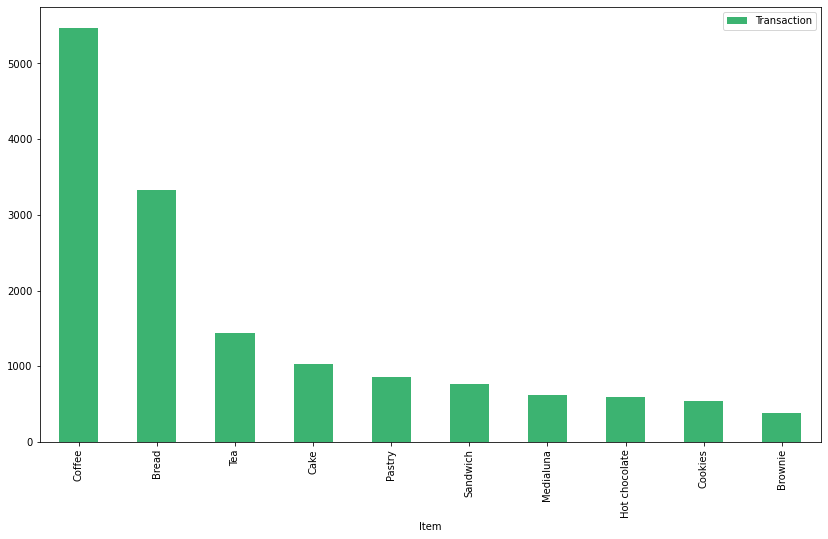

In [15]:
df2.plot(x='Item',y='Transaction',color='mediumseagreen',kind='bar',figsize=(14,8))

**Q3- Which time period has more transactions?**

In [16]:
df3= df.groupby(['period_day'])['Transaction'].count().sort_values(ascending=False).reset_index()

In [17]:
df3

,period_day,Transaction
0,afternoon,11569
1,morning,8404
2,evening,520
3,night,14


<AxesSubplot:xlabel='period_day'>

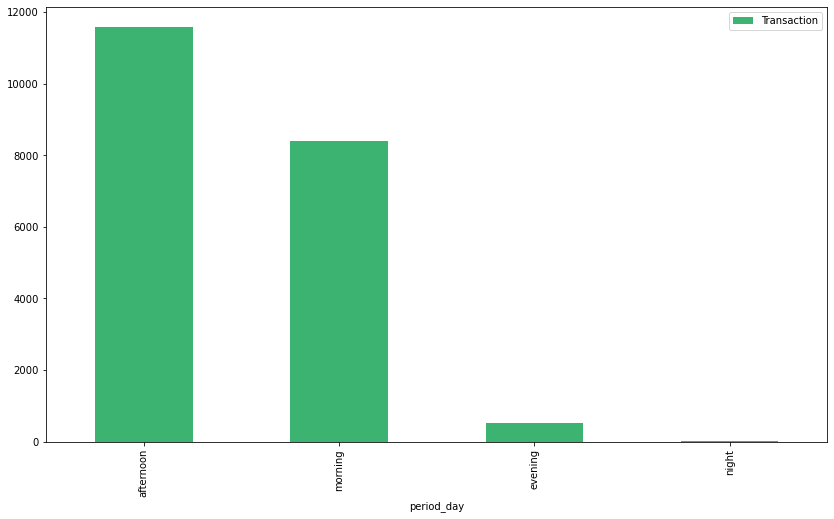

In [18]:
df3.plot(x='period_day',y='Transaction',color='mediumseagreen',kind='bar',figsize=(14,8))

**transactions By Year(Extra):**

In [19]:
dfY = df.copy()

In [20]:
dfY['year'] = pd.DatetimeIndex(dfY['date_time']).year

In [21]:
dfY=dfY.groupby(['year'])['Transaction'].count().reset_index()

<AxesSubplot:xlabel='year'>

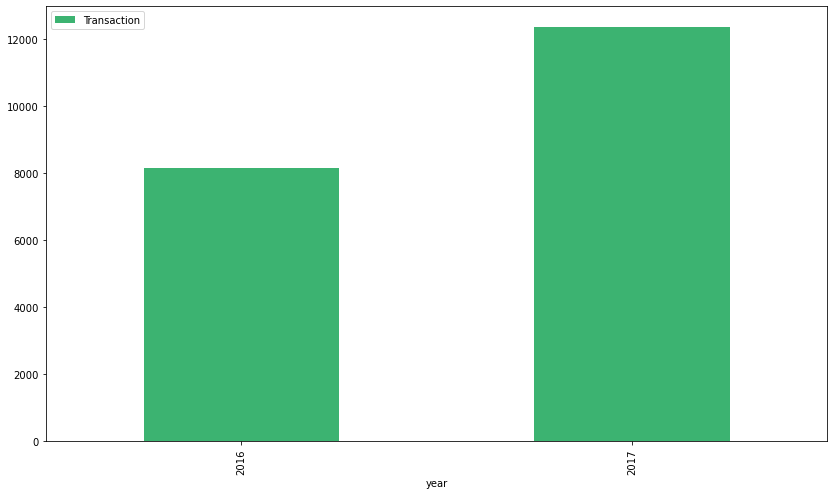

In [22]:
dfY.plot(x='year',y='Transaction',color='mediumseagreen',kind='bar',figsize=(14,8))

**Q4- Which day type has more transaction?**

In [23]:
df4 = df.groupby(['weekday_weekend'])['Transaction'].count().sort_values(ascending=False).reset_index()

In [24]:
df4

,weekday_weekend,Transaction
0,weekday,12807
1,weekend,7700


<AxesSubplot:ylabel='Transaction'>

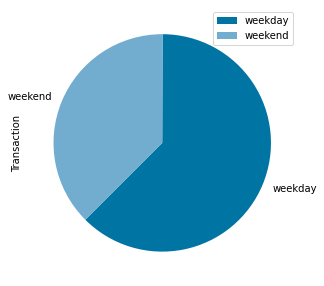

In [25]:
df4.plot.pie(y='Transaction',labels=['weekday','weekend'],colors=['#0075A4','#72ADCF'],startangle=-135, figsize=(5, 5))

**Q5- What customers preffer to buy on weekends morning?<br/>**

In [26]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [27]:
df5 = df[df['weekday_weekend']=='weekend']
df5 = df[df['period_day']=='morning']

In [28]:
df5=df5.groupby(['Item'])['Transaction'].count().sort_values(ascending=False).reset_index().head(5)

In [29]:
df5

,Item,Transaction
0,Coffee,2561
1,Bread,1610
2,Pastry,604
3,Tea,456
4,Medialuna,402


<AxesSubplot:xlabel='Item'>

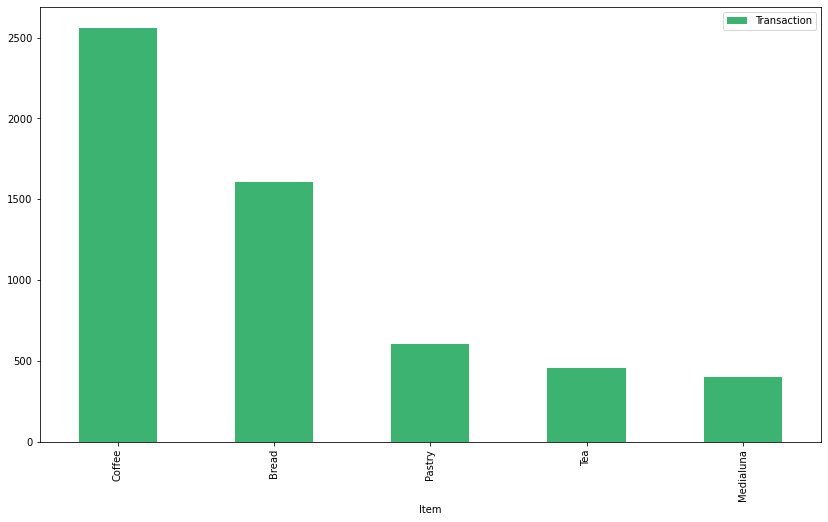

In [30]:
df5.plot(x='Item',y='Transaction',color='mediumseagreen',kind='bar',figsize=(14,8))

**Q6- Which month has more transactions?<br/>**

In [31]:
df['month']=pd.DatetimeIndex(df['date_time']).month_name()

In [32]:
df6 = df.groupby(['month'])['Transaction'].count().sort_values(ascending=False).reset_index()

In [33]:
df6['Transaction %']= df6['Transaction']/(df6['Transaction'].sum())
df6['Transaction %']= df6['Transaction %']*100

In [34]:
df6

,month,Transaction,Transaction %
0,March,3220,15.701955
1,November,3076,14.999756
2,January,3027,14.760813
3,February,2748,13.400302
4,December,2647,12.907788
5,April,1048,5.110450
6,October,1041,5.076315
7,May,924,4.505779
8,July,741,3.613400
9,June,739,3.603648


<AxesSubplot:xlabel='month'>

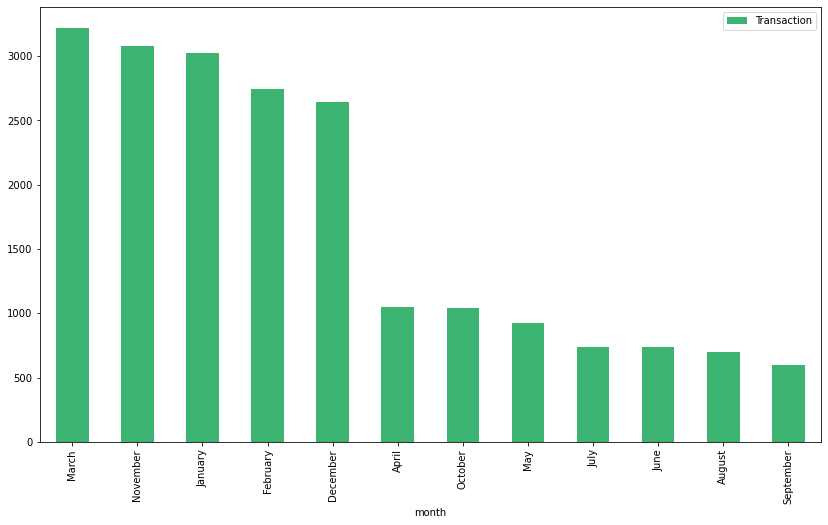

In [35]:
df6.plot(x='month',y='Transaction',color='mediumseagreen',kind='bar',figsize=(14,8))

<strong>MQ- Recommend Bundles to Increase Sales?</strong>

Product bundles means buying two or more product as one product,

To decide which products should be included in the bundles, we have to understand customers buying patterns,

One of the most popular ML Algorithm used to identfy customer buying pattrerns is Apriori Algorithm,

Apriori Algorithm contains 3 main measures:

**1- Support:** </br>
    This measure shows how popular product is, and measured by calculating the ratio between product appaearing number and number of all transactions.
    Example: Product(A) Appeared 5 times on all transaction and the number of transaction is 10 calculate Product(A) Support,</br> </br> $$Support(A) =\frac{5}{10}=50\%$$</br> </br>
Thats mean half of the customers actually buoght Product(A).    
</br>
    
**2- Confidence:** </br>
    This measure shows how likely Product B is purchased when Product A is purchased, and measured by calculating the ratio between Product A,B appearing together number and number of all transaction that has Product A On it.
    Example: Product(A) and Product(B) Appeared together on 2 transaction, and the number of product A appearing in all transaction is 6, how much likley who bught product A is going to buy product B?
Confidence,</br> </br> $$Confidence(A → B) =\frac{2}{6}=33.3\%$$</br> </br>
Thats mean customer who bught Product(A) most likley with percentage equal to 33.3% is going to buy Product(B).
</br>


**3- Lift:** </br>
    This meassure show how likely Product(B) is purchased when Product(A) is purchased, while controlling for how popular item Y is.
</br> </br> $$Lift(A → B) =\frac{Support(A→B)}{Support(A)‎‎ ✖ ‎ ‎ Support(B)}$$</br> </br>


In [36]:
#Import Apriori
from efficient_apriori import apriori

In [37]:
#Import TransactionEncoder to Fit Transactions
from mlxtend.preprocessing import TransactionEncoder

In [38]:
transactions=[]
for item in df['Transaction'].unique():
    lst=list(set(df[df['Transaction']==item]['Item']))
    transactions.append(lst)

transactions[0:4]

[['Bread'], ['Scandinavian'], ['Cookies', 'Jam', 'Hot chocolate'], ['Muffin']]

In [39]:
te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions)
data = pd.DataFrame(encodedData, columns=te.columns_)
data.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
itemsets, rules = apriori(transactions,min_support=0.02, min_confidence=0.2)

In [41]:
print(itemsets)

{1: {('Bread',): 3097, ('Scandinavian',): 275, ('Cookies',): 515, ('Hot chocolate',): 552, ('Muffin',): 364, ('Pastry',): 815, ('Coffee',): 4528, ('Medialuna',): 585, ('Tea',): 1350, ('Farm House',): 371, ('Juice',): 365, ('Soup',): 326, ('Cake',): 983, ('Sandwich',): 680, ('Alfajores',): 344, ('Brownie',): 379, ('Truffles',): 192, ('Toast',): 318, ('Scone',): 327}, 2: {('Bread', 'Cake'): 221, ('Bread', 'Coffee'): 852, ('Bread', 'Pastry'): 276, ('Bread', 'Tea'): 266, ('Cake', 'Coffee'): 518, ('Cake', 'Tea'): 225, ('Coffee', 'Cookies'): 267, ('Coffee', 'Hot chocolate'): 280, ('Coffee', 'Juice'): 195, ('Coffee', 'Medialuna'): 333, ('Coffee', 'Pastry'): 450, ('Coffee', 'Sandwich'): 362, ('Coffee', 'Tea'): 472, ('Coffee', 'Toast'): 224}}


In [42]:
#rules_rhs = filter(lambda rule: len(rule.lhs) == 0.02 and len(rule.rhs) ==0.01,rules)

#for rules in sorted(rules_rhs, key=lambda rule: rule.lift):
#  print(rules)

In [43]:
rules_rhs = rules

for rules in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rules)

{Bread} -> {Coffee} (conf: 0.275, supp: 0.090, lift: 0.575, conv: 0.720)
{Cake} -> {Bread} (conf: 0.225, supp: 0.023, lift: 0.687, conv: 0.868)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.731, conv: 0.802)
{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.035, conv: 1.017)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.030, lift: 1.060, conv: 1.059)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.084, conv: 1.083)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.055, lift: 1.102, conv: 1.103)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.113, conv: 1.115)
{Juice} -> {Coffee} (conf: 0.534, supp: 0.021, lift: 1.117, conv: 1.120)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.048, lift: 1.154, conv: 1.165)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.190, conv: 1.211)
{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.472, conv: 1.765)
{Cake} -> {Tea} (conf: 0.229, supp: 0.024, lift: 1.605, conv: 1.112)


**Model Evaluation**</br>
Apirori evaluation done by measuring the lift,
Since lift value greater than 1 means that item B is likely to be bought if item A is bought, while a value less than 1 means that item B is unlikely to be bought if item A is bought.

#### <strong>3. Conclustion</strong>

**Q1- How many items are there?<br/>**
    A1- There is 94 unique products.
    <br/><br/>
**Q2- Top 10 most ordered products?<br/>**
    A2- the top 10 most ordered products are :(Coffee, Bread, Tea, Cake, Pastry, Sandwich, Medialuna, Hot Chocolate, Cookies, Brownie).
    <br/><br/>
**Q3- Which time period has more transactions?<br/>**
    A3- Most of customers came at afternoon.
    <br/><br/>
**Q4- Which day type has more transaction?<br/>**
    A4- Week days.
    <br/><br/>
**Q5- What customers preffer to buy on weekends morning?<br/>**
    A5- Customers preffer to buy these items on weekends morning :(Coffee, Bread, Pastry, Tea, Medialuna).
    <br/><br/>
**Q6- Which month has more trafic?<br/>**
    A6- On March. 
    <br/><br/>
    


**MQ- Recommond bundles to increase sales?<br/>**

 AQ- {Pastry, Bread}, {Cookies, Coffee}, {Cake, Coffee}, {Sandwich, Coffee}, {Toast, Coffee}
{Cake, Tea}